<h1>Objective</h1>
<b>The Objective of this project is to use the collected data from existing customers to build a model that will help the marketing team identify potential customers who are more likely to subscribe term deposit, and thus increase their hit ratio</b>

<h1>Importing Dependencies</h1>

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
df = pd.read_csv('C:\\Users\\Srivatsa\\Desktop\\Great_Lakes\\Datasets\\bank-full.csv')

In [9]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [10]:
df.shape

(45211, 17)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<h1>Univariate Analysis</h1>

<h2>Age</h2>

In [12]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

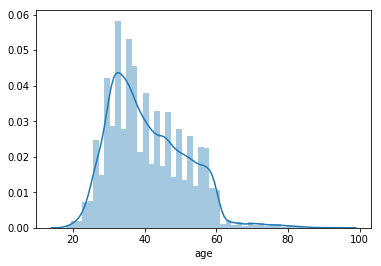

In [13]:
sns.distplot(df['age'])

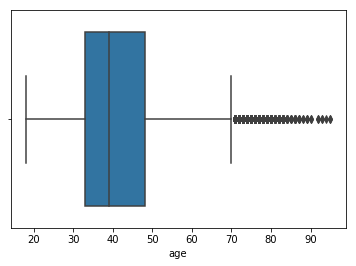

In [14]:
sns.boxplot(df['age'])

<h2>Job</h2>

In [15]:
df['job'].describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

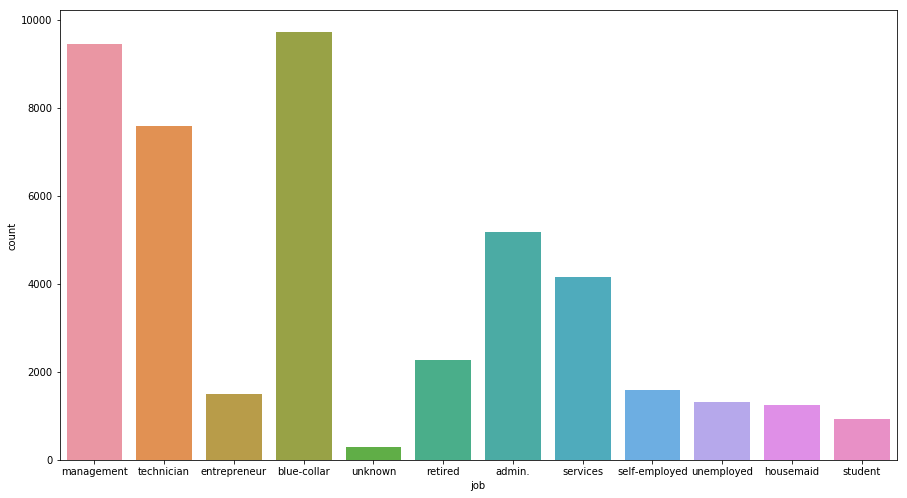

In [16]:
a4_dims = (15, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(df['job'])

In [17]:
encoder = LabelEncoder()

In [18]:
df['job_L'] = encoder.fit_transform(df['job'])

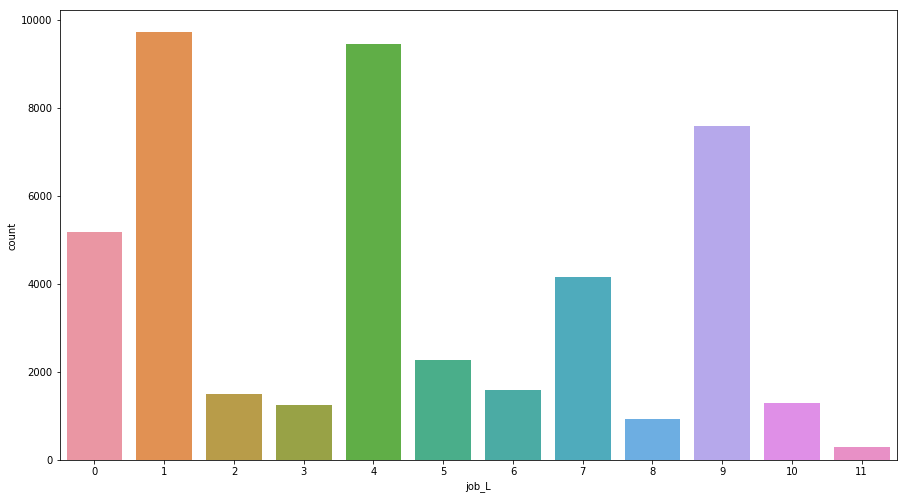

In [213]:
a4_dims = (15, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(df['job_L'])

<h2>Marital</h2>

In [19]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

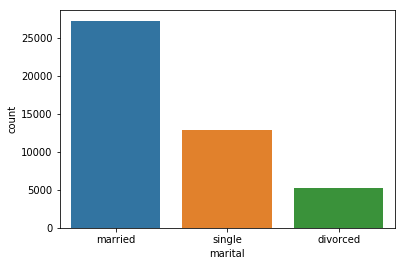

In [20]:
sns.countplot(df['marital'])

In [21]:
df['marital_L'] = encoder.fit_transform(df['marital'])

<h2>Education</h2>

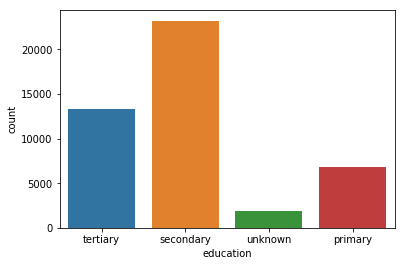

In [22]:
sns.countplot(df['education'])

In [23]:
df['education_L'] = encoder.fit_transform(df['education'])

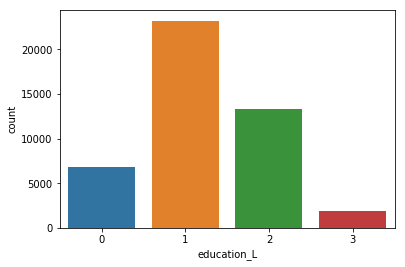

In [218]:
sns.countplot(df['education_L'])

<h2>Default</h2>

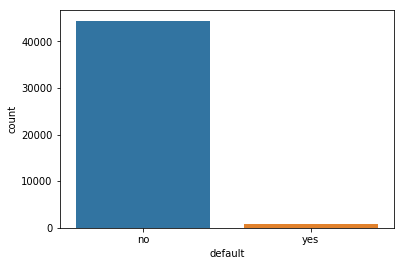

In [24]:
sns.countplot(df['default'])

In [25]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [26]:
df['default_L'] = encoder.fit_transform(df['default'])

<h2>Balance</h2>

In [27]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

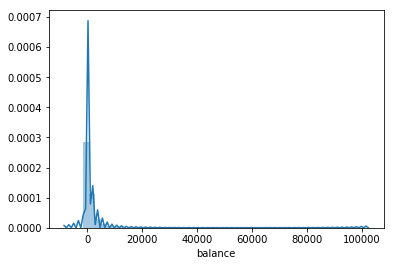

In [28]:
sns.distplot(df['balance'])

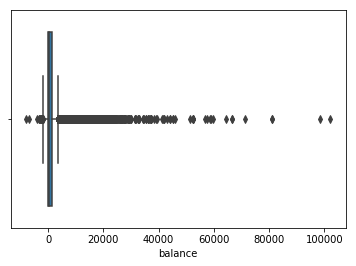

In [29]:
sns.boxplot(df['balance'])

<h2>housing</h2>

In [30]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

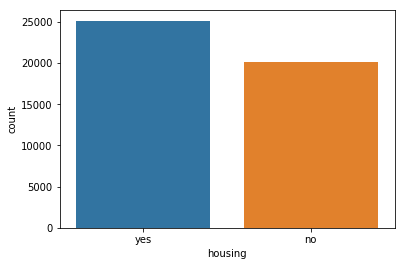

In [31]:
sns.countplot(df['housing'])

In [32]:
df['housing_L'] = encoder.fit_transform(df['housing'])

<h2>Loan</h2>

In [33]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

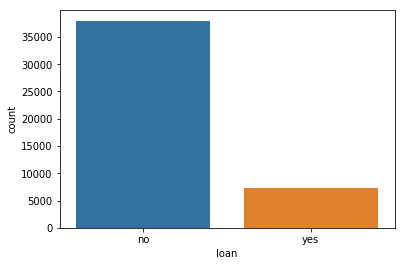

In [34]:
sns.countplot(df['loan'])

In [35]:
df['loan_L'] = encoder.fit_transform(df['loan'])

<h2>contact</h2>

In [36]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

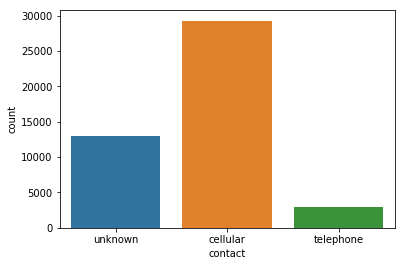

In [37]:
sns.countplot(df['contact'])

In [38]:
df['contact_L'] = encoder.fit_transform(df['contact'])

<h2>Day</h2>

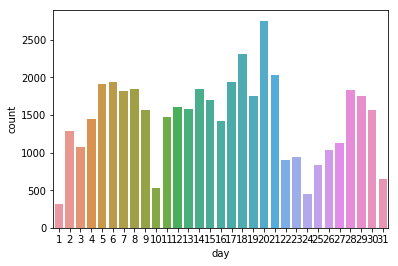

In [39]:
sns.countplot(df['day'])

<h2>Month</h2>

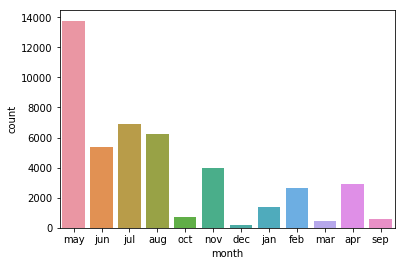

In [40]:
sns.countplot(df['month'])

In [41]:
df['month_L'] = encoder.fit_transform(df['month'])

<h2>Duration</h2>

In [42]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

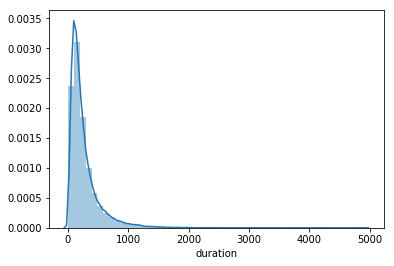

In [43]:
sns.distplot(df['duration'])

<h2>campaign</h2>

In [44]:
df['campaign'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [45]:
df['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

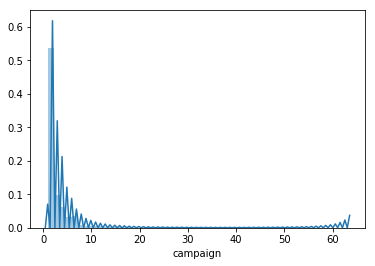

In [46]:
sns.distplot(df['campaign'])

<h2>pdays</h2>

In [47]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [48]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 189       60
 186       60
 174       57
 96        57
 349       57
 363       55
 97        54
 90        54
 196       51
 365       51
 368       49
 342       49
 98        49
        ...  
 774        1
 550        1
 396        1
 492        1
 466        1
 45         1
 434        1
 18         1
 529        1
 465        1
 401        1
 784        1
 656        1
 592        1
 528        1
 464        1
 432        1
 655        1
 495        1
 543        1
 47         1
 782        1
 686        1
 558        1
 526        1
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

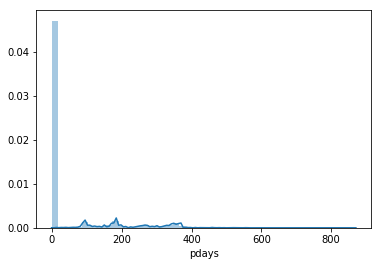

In [49]:
sns.distplot(df['pdays'])

<h2>Previous</h2>

In [50]:
df['previous'].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [51]:
df['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

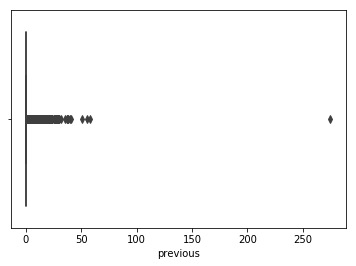

In [52]:
sns.boxplot(df['previous'])

<h2>poutcome</h2>

In [53]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

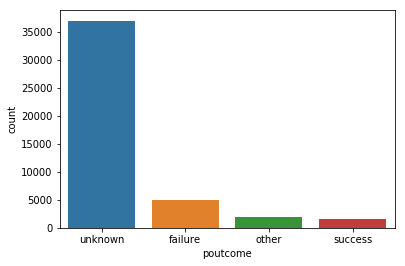

In [54]:
sns.countplot(df['poutcome'])

In [55]:
df['poutcome_L'] = encoder.fit_transform(df['poutcome'])

<h2>Target</h2>

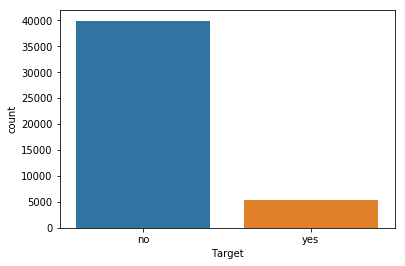

In [56]:
sns.countplot(df['Target'])

In [57]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [58]:
df['Target_L'] = encoder.fit_transform(df['Target'])

<h1>Normalizing and Standardizing the values in the Numerical Variables</h1>

In [59]:
df_numeric = df[['age', 'balance', 'day','month_L','campaign', 'pdays', 'previous', 'duration']]

In [60]:
scaler1 = MinMaxScaler()
df_numeric_normalized = scaler1.fit_transform(df_numeric)

In [61]:
scaler2 = StandardScaler()
df_numeric_standardized = scaler2.fit_transform(df_numeric)

In [62]:
df_numeric_normalized = pd.DataFrame(df_numeric_normalized, columns=['age','balance','day',
                                                                     'month_L','campaign','pdays',
                                                                     'previous','duration'])

In [63]:
df_numeric_standardized = pd.DataFrame(df_numeric_standardized, columns=['age',
                                                                            'balance',
                                                                            'day',
                                                                            'month_encoded_L',
                                                                            'campaign',
                                                                            'pdays',
                                                                            'previous',
                                                                            'duration'])

<h1>Categorical Data</h1>

In [242]:
df_cat = df[['marital_L','default_L','housing_L','loan_L', 'month_L', 'Target_L', 'contact_L']]

In [243]:
df_cat.describe()

,marital_L,default_L,housing_L,loan_L,month_L,Target_L,contact_L
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1.167725,0.018027,0.555838,0.160226,5.523014,0.116985,0.640242
std,0.608230,0.133049,0.496878,0.366820,3.006911,0.321406,0.897951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,0.000000,8.000000,0.000000,2.000000
max,2.000000,1.000000,1.000000,1.000000,11.000000,1.000000,2.000000


<h2>Creating 2 Intermediate DataSets with categorical and the numeric variables<h2>

In [244]:
df_Normalized = pd.concat([df_cat, df_numeric_normalized], sort=False, axis=1)

In [245]:
df_Standardized = pd.concat([df_cat, df_numeric_standardized], sort=False, axis=1)

<h2>Handling Missing values from columns - poutcome, contact, job, and education</h2>

<h3>Education</h3>
We do not have many values in the unknown column. Hence we can simply impute the unknowns with the most common value in the column.

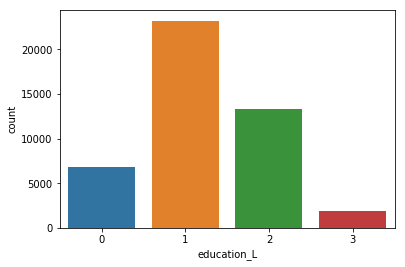

In [246]:
sns.countplot(df['education_L'])

In [247]:
SimpleImputer(add_indicator=False, 
              copy=True, 
              fill_value=None, 
              missing_values=3,
              strategy='most_frequent', 
              verbose=0)

SimpleImputer(add_indicator=False, copy=True, fill_value=None, missing_values=3,
              strategy='most_frequent', verbose=0)

In [248]:
imputer = SimpleImputer(missing_values=3, strategy="most_frequent")

In [249]:
imputer.fit(np.array(df['education_L']).reshape(-1,1))

SimpleImputer(add_indicator=False, copy=True, fill_value=None, missing_values=3,
              strategy='most_frequent', verbose=0)

In [250]:
x = imputer.transform(np.array(df['education_L']).reshape(-1,1))

In [251]:
df['education_L_imputed'] = pd.Series(x.flatten())

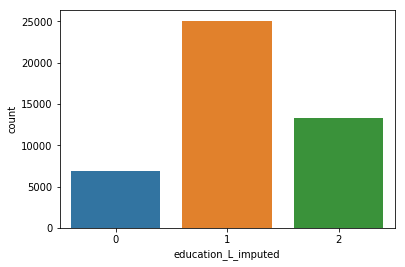

In [252]:
sns.countplot(df['education_L_imputed'])

<h3>Job</h3>
We do not have many values in the unknown column. Hence we can simply impute the unknowns with the most common value in the column.

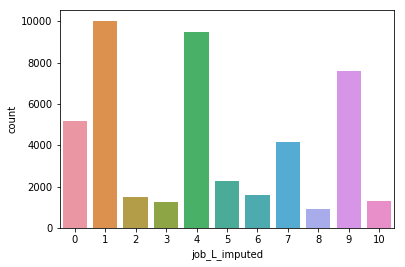

In [253]:
SimpleImputer(add_indicator=False, 
              copy=True, 
              fill_value=None, 
              missing_values=11,
              strategy='most_frequent', 
              verbose=0)
imputer = SimpleImputer(missing_values=11, strategy="most_frequent")
imputer.fit(np.array(df['job_L']).reshape(-1,1))
x = imputer.transform(np.array(df['job_L']).reshape(-1,1))
df['job_L_imputed'] = pd.Series(x.flatten())
sns.countplot(df['job_L_imputed'])

<b>Appending the new education and job columns to the 2 datasets</b>

In [254]:
df_Normalized['education_L_imputed'] = df['education_L_imputed']
df_Normalized['job_L_imputed'] = df['job_L_imputed']

In [255]:
df_Standardized['education_L_imputed'] = df['education_L_imputed']
df_Standardized['job_L_imputed'] = df['job_L_imputed']

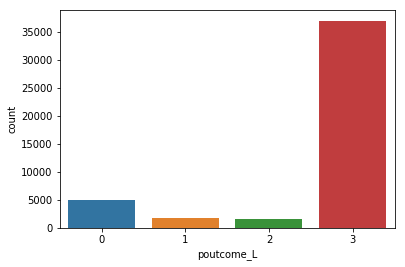

In [256]:
sns.countplot(df['poutcome_L'])

In [257]:
# 1. Adding the poutcome column to the df_Normalized
df_Normalized['poutcome_L'] = df['poutcome_L']
df_Standardized['poutcome_L'] = df['poutcome_L']

In [258]:
df_Normalized[df_Normalized['poutcome_L']!=3].head()

,marital_L,default_L,housing_L,loan_L,month_L,Target_L,contact_L,age,balance,day,month_L,campaign,pdays,previous,duration,education_L_imputed,job_L_imputed,poutcome_L
24060,1,0,0,0,10,0,1,0.194805,0.080811,0.666667,0.909091,0.0,0.174312,0.010909,0.007930,2,0,0
24062,2,0,1,1,10,1,1,0.311688,0.070561,0.666667,0.909091,0.0,0.191514,0.003636,0.105531,1,0,1
24064,1,0,1,0,10,1,1,0.194805,0.104071,0.666667,0.909091,0.0,0.105505,0.014545,0.029280,1,7,0
24072,1,0,1,0,10,0,1,0.233766,0.094729,0.700000,0.909091,0.0,0.099771,0.014545,0.014843,2,4,1
24077,1,0,1,0,10,1,1,0.233766,0.072803,0.733333,0.909091,0.0,0.165138,0.010909,0.028467,2,4,0


In [259]:
df_Normalized[df_Normalized['poutcome_L']!=3].shape

(8252, 18)

In [260]:
X_train = df_Normalized[df_Normalized['poutcome_L']!=3].iloc[:,0:17]

In [261]:
y_train = df_Normalized[df_Normalized['poutcome_L']!=3]['poutcome_L']

In [262]:
X_test = df_Normalized[df_Normalized['poutcome_L']==3].iloc[:,0:17]

In [263]:
for i in [X_train, y_train, X_test]:
    print(i.shape)

(8252, 17)
(8252,)
(36959, 17)


In [264]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [265]:
predicted_labels = NNH.predict(X_test)

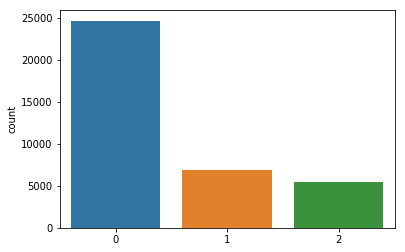

In [266]:
sns.countplot(pd.Series(predicted_labels))

In [267]:
df_Normalized_full = pd.concat([df_Normalized[df_Normalized['poutcome_L']!=3], 
                                df_Normalized[df_Normalized['poutcome_L']==3]]).reset_index(drop=True)

In [268]:
df_Standardized_full = pd.concat([df_Standardized[df_Standardized['poutcome_L']!=3], 
                                  df_Standardized[df_Standardized['poutcome_L']==3]]).reset_index(drop=True)

In [269]:
df_Normalized_full['poutcome_complete'] = pd.concat([df_Normalized[df_Normalized['poutcome_L']!=3]['poutcome_L'], 
                                                     pd.Series(predicted_labels)]).reset_index(drop=True)

In [270]:
df_Standardized_full['poutcome_complete'] = pd.concat([df_Standardized[df_Standardized['poutcome_L']!=3]['poutcome_L'], 
                                                       pd.Series(predicted_labels)]).reset_index(drop=True)

In [271]:
df_Standardized_full.drop('poutcome_L', axis=1, inplace=True)
df_Normalized_full.drop('poutcome_L', axis=1, inplace=True)

In [272]:
df_Standardized_full.shape

(45211, 18)

In [273]:
df_Normalized_full.shape

(45211, 18)

In [274]:
df_Normalized_full.head()

,marital_L,default_L,housing_L,loan_L,month_L,Target_L,contact_L,age,balance,day,month_L,campaign,pdays,previous,duration,education_L_imputed,job_L_imputed,poutcome_complete
0,1,0,0,0,10,0,1,0.194805,0.080811,0.666667,0.909091,0.0,0.174312,0.010909,0.007930,2,0,0
1,2,0,1,1,10,1,1,0.311688,0.070561,0.666667,0.909091,0.0,0.191514,0.003636,0.105531,1,0,1
2,1,0,1,0,10,1,1,0.194805,0.104071,0.666667,0.909091,0.0,0.105505,0.014545,0.029280,1,7,0
3,1,0,1,0,10,0,1,0.233766,0.094729,0.700000,0.909091,0.0,0.099771,0.014545,0.014843,2,4,1
4,1,0,1,0,10,1,1,0.233766,0.072803,0.733333,0.909091,0.0,0.165138,0.010909,0.028467,2,4,0


In [275]:
df_Standardized_full.head()

,marital_L,default_L,housing_L,loan_L,month_L,Target_L,contact_L,age,balance,day,month_encoded_L,campaign,pdays,previous,duration,education_L_imputed,job_L_imputed,poutcome_complete
0,1,0,0,0,10,0,1,-0.747384,-0.157739,0.624050,1.488915,-0.569351,1.106609,1.050473,-0.851036,2,0,0
1,2,0,1,1,10,1,1,0.100181,-0.528543,0.624050,1.488915,-0.569351,1.256418,0.182198,1.012861,1,0,1
2,1,0,1,0,10,1,1,-0.747384,0.683715,0.624050,1.488915,-0.569351,0.507374,1.484611,-0.443309,1,7,0
3,1,0,1,0,10,0,1,-0.464863,0.345754,0.744208,1.488915,-0.569351,0.457438,1.484611,-0.719010,2,4,1
4,1,0,1,0,10,1,1,-0.464863,-0.447419,0.864365,1.488915,-0.569351,1.026711,1.050473,-0.458841,2,4,0


<h4>Now we have 2 datasets fit for further processing:</h4>
    <ol>
        <li>df_Normalized_full</li>
        <li>df_Standardized_full</li>
    </ol>
<h4>We have made the following transformations</h4>
<ul>
    <li>Label Encoded the categorical variables</li>
    <li>Standardized and Normalized the numerical variables and created 2 datasets</li>
    <li>Imputed the missing values in 2 variables - poutcome and Education.(Contact has been left as such)</li>
</ul>

<h1>Bivariate Analysis</h1>

In [276]:
corr_matrix = df_Standardized_full.corr()

In [277]:
corr_matrix['Target_L']

marital_L              0.045588
default_L             -0.022419
housing_L             -0.139173
loan_L                -0.068185
month_L               -0.024471
Target_L               1.000000
contact_L             -0.148395
age                    0.025155
balance                0.052838
day                   -0.028348
month_encoded_L       -0.024471
campaign              -0.073172
pdays                  0.103621
previous               0.093236
duration               0.394521
education_L_imputed    0.068633
job_L_imputed          0.040786
poutcome_complete      0.349112
Name: Target_L, dtype: float64

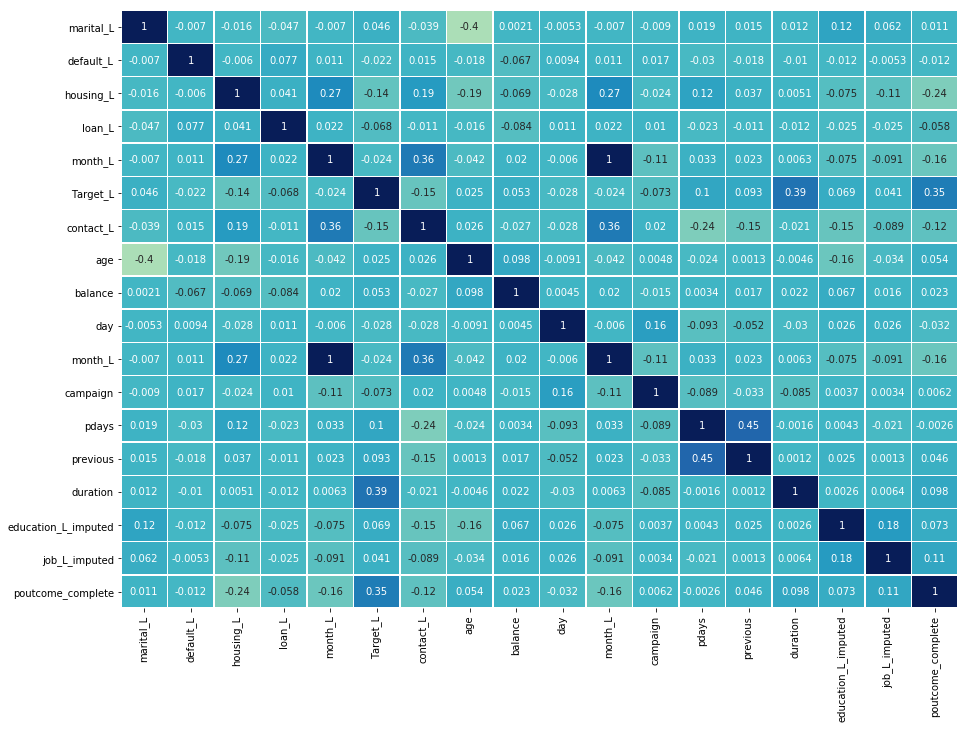

In [278]:
plt.figure(figsize=(15,11))
sns.heatmap(df_Normalized_full.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

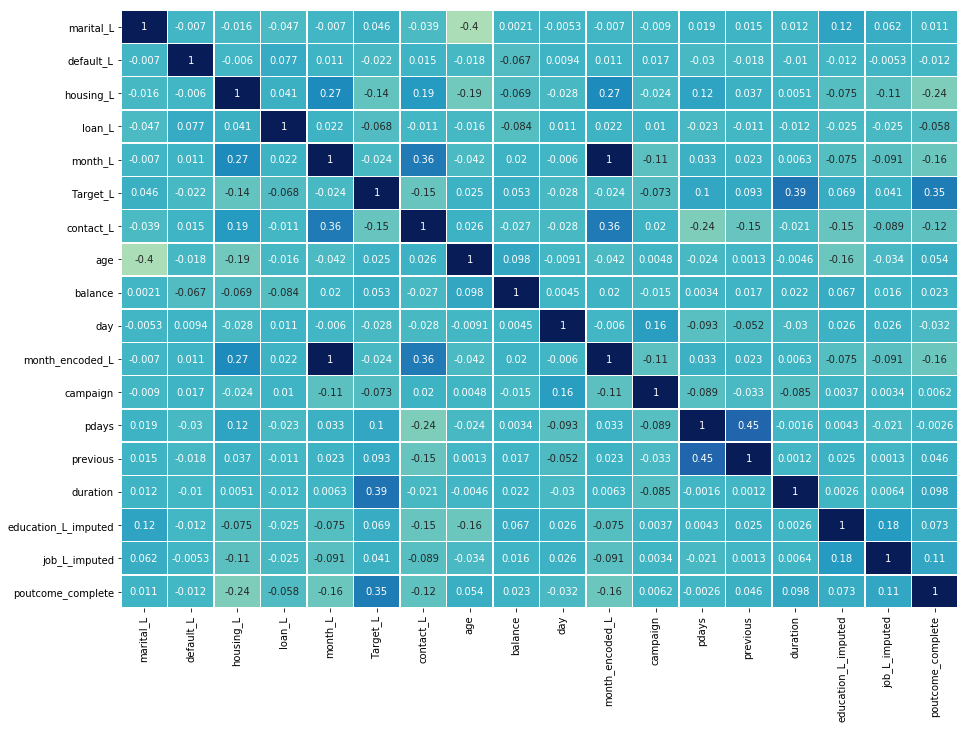

In [279]:
plt.figure(figsize=(15,11))
sns.heatmap(df_Standardized_full.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

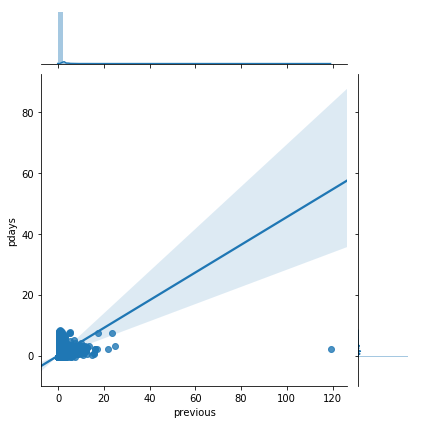

In [280]:
sns.jointplot(df_Standardized_full.previous,df_Standardized_full.pdays,kind='reg')

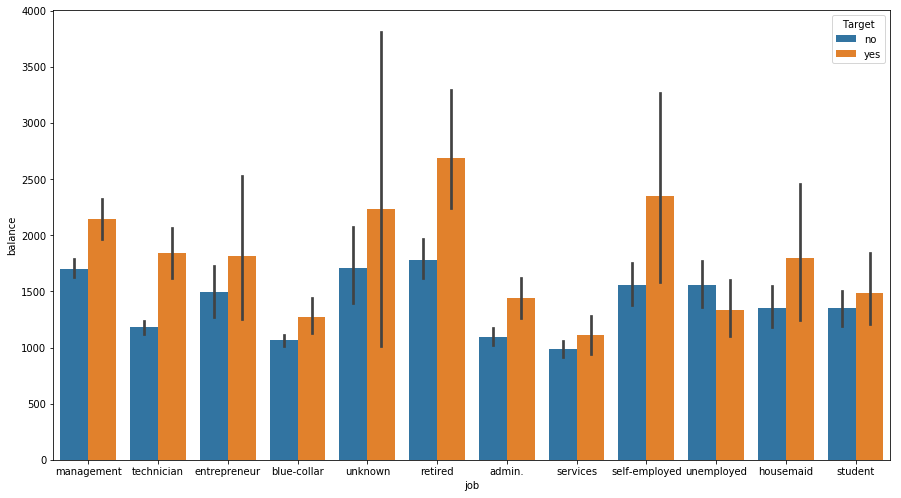

In [281]:
a4_dims = (15, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(df['job'],df['balance'], hue=df['Target'])

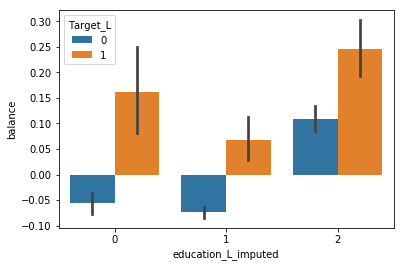

In [283]:
sns.barplot(df_Standardized_full['education_L_imputed'],df_Standardized_full['balance'], hue=df_Standardized_full['Target_L'])

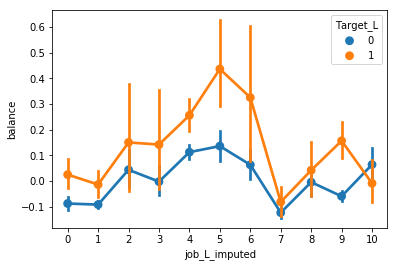

In [286]:
sns.pointplot(df_Standardized_full['job_L_imputed'],
              df_Standardized_full['balance'], 
              hue=df_Standardized_full['Target_L'])

<h2>Observations: In relation to Job and Education</h2>
<ul>
    <li>The people with more balance seem likely to subscribe term deposit.</li>
    <li>The people with secondary and tertiary education, and people in management, who are retired or self employed seem to likely to subscribe term deposit</li>
</ul>

<h1>Simple Decision Tree</h1>

<h3>Gini</h3>

In [125]:
X1 = df_Standardized_full.drop("Target_L" , axis=1)
y1 = df_Standardized_full.pop("Target_L")
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.30, random_state=1)

In [126]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [127]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8902978472427012


<h3>Entropy</h3>

In [129]:
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [130]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8947213211442052


<h3>Pruning the tree</h3>

In [132]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9023288147375739
0.896711884399882


<h1>Random Forest</h1>

0.9228841049837806


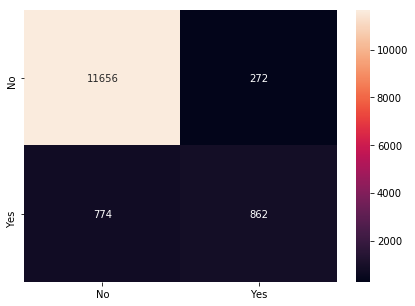

In [171]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = ["No","Yes"], columns = ["No","Yes"])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

<h1>Bagging</h1>

0.9223680330286051


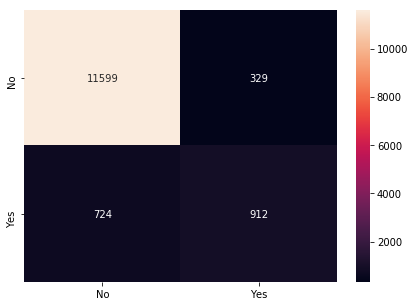

In [172]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = ["No","Yes"], columns = ["No","Yes"])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

<h1>AdaBoosting</h1>

0.9067384252432911


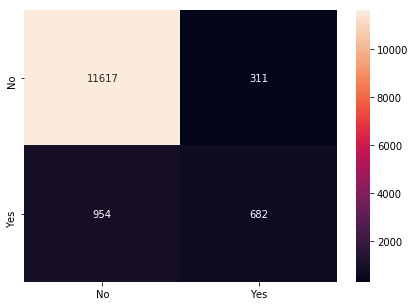

In [173]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = ["No","Yes"], columns = ["No","Yes"])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

<h1>GradientBoost</h1>

0.9152167502211737


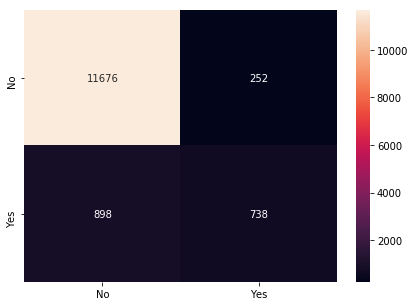

In [174]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))


cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = ["No","Yes"], columns = ["No","Yes"])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

<h2>Observations:</h2>
<ul>
    <li>Gini gives a better accuracy than entropy (post pruning)</li>
    <li>There is no difference in the accuracy between models using the Normalized and Standardized datasets</li>
    <li>The decision tree seem to overfit the training data as excepted</li>
    <li>Pruning the tree has increased the accuracy on the test set</li>
    <li>Random Forest seems to have the most accuracy score.</li>
</ul>